# Looking into Poisson regression
starting from https://docs.pymc.io/notebooks/GLM-linear.html

In [1]:
%matplotlib inline

from pymc3 import  *

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

sns.set(font_scale=1.5)

## Start with regular to understand tools

In [2]:

size = 200
true_intercept = 1
true_slope = 2

x = np.linspace(0, 1, size)
# y = a + b*x
true_regression_line = true_intercept + true_slope * x
# add noise
y = true_regression_line + np.random.normal(scale=.5, size=size)

data = dict(x=x, y=y)


df = pd.DataFrame(data)
df.head()

,x,y
0,0.000000,1.166876
1,0.005025,1.330457
2,0.010050,0.647333
3,0.015075,0.536920
4,0.020101,0.632782


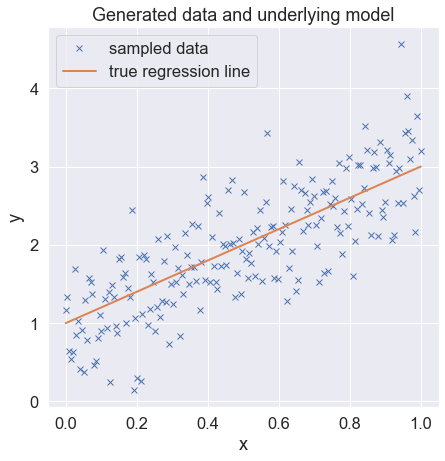

In [3]:
fig = plt.figure(figsize=(7, 7))
ax = fig.add_subplot(111, xlabel='x', ylabel='y', title='Generated data and underlying model')
ax.plot(x, y, 'x', label='sampled data')
ax.plot(x, true_regression_line, label='true regression line', lw=2.)
plt.legend(loc=0);

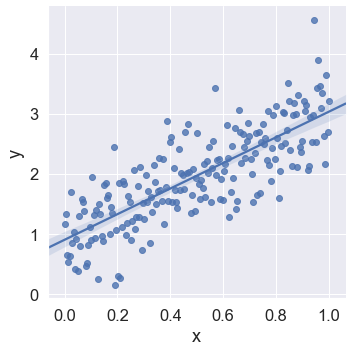

In [4]:
sns.lmplot('x','y', data=df)

In [5]:
with Model() as model:
    # specify glm and pass in data. The resulting linear model, its likelihood and
    # and all its parameters are automatically added to our model.
    glm.GLM.from_formula('y ~ x', data)
    trace = sample(3000, cores=2) # draw 3000 posterior samples using NUTS sampling

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [sd, x, Intercept]
Sampling 2 chains: 100%|██████████| 7000/7000 [00:04<00:00, 1507.13draws/s]


/Users/balarsen/miniconda3/envs/python3/lib/python3.7/site-packages/ipykernel_launcher.py:3: UserWarning: This figure was using constrained_layout==True, but that is incompatible with subplots_adjust and or tight_layout: setting constrained_layout==False. 
  This is separate from the ipykernel package so we can avoid doing imports until


<Figure size 504x504 with 0 Axes>

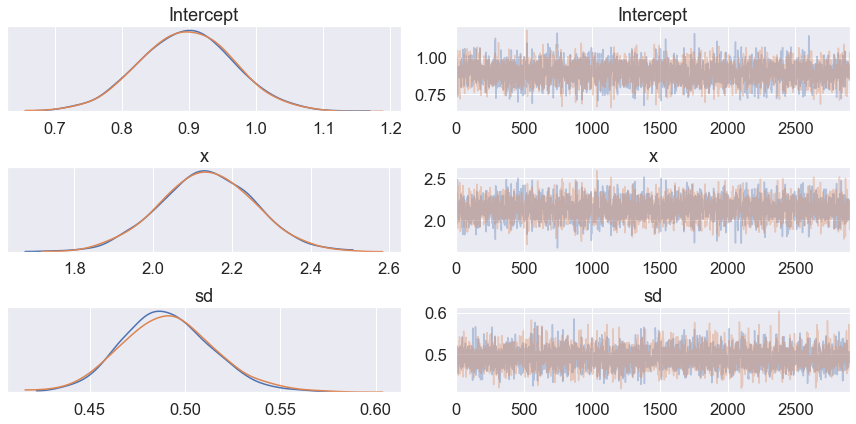

In [6]:
plt.figure(figsize=(7, 7))
traceplot(trace[100:])
plt.tight_layout();

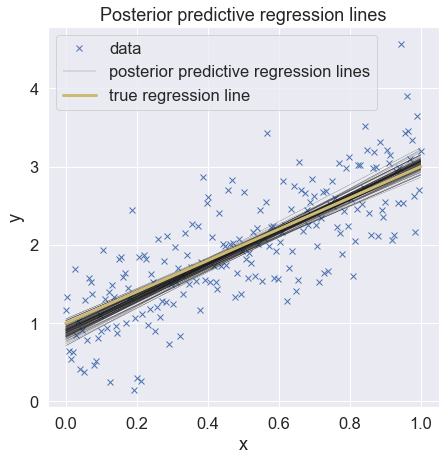

In [7]:
plt.figure(figsize=(7, 7))
plt.plot(x, y, 'x', label='data')
plot_posterior_predictive_glm(trace, samples=100,
                              label='posterior predictive regression lines')
plt.plot(x, true_regression_line, label='true regression line', lw=3., c='y')

plt.title('Posterior predictive regression lines')
plt.legend(loc=0)
plt.xlabel('x')
plt.ylabel('y');

## and now look into this

something is not quite right with my undrstanding

In [8]:
df = pd.read_csv('http://stats.idre.ucla.edu/stat/data/poisson_sim.csv', index_col=0)
df['x'] = df['math']
df['y'] = df['num_awards']
df.head()

,num_awards,prog,math,x,y
id,,,,,
45,0,3,41,41,0
108,0,1,41,41,0
15,0,3,44,44,0
67,0,3,42,42,0
153,0,3,40,40,0


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


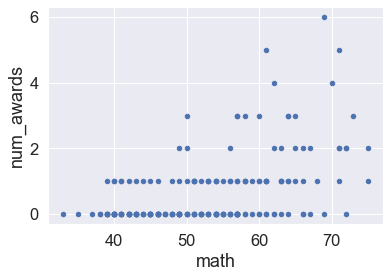

In [9]:
df.plot(kind='scatter', x='math', y='num_awards')

In [10]:
with Model() as model:
    # specify glm and pass in data. The resulting linear model, its likelihood and
    # and all its parameters are automatically added to our model.
    glm.GLM.from_formula('y ~ x', df)
    trace = sample(3000, cores=2) # draw 3000 posterior samples using NUTS sampling
    

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [sd, x, Intercept]
Sampling 2 chains: 100%|██████████| 7000/7000 [00:13<00:00, 530.68draws/s]
The acceptance probability does not match the target. It is 0.8786841402380285, but should be close to 0.8. Try to increase the number of tuning steps.
The acceptance probability does not match the target. It is 0.8850469178239363, but should be close to 0.8. Try to increase the number of tuning steps.


/Users/balarsen/miniconda3/envs/python3/lib/python3.7/site-packages/ipykernel_launcher.py:3: UserWarning: This figure was using constrained_layout==True, but that is incompatible with subplots_adjust and or tight_layout: setting constrained_layout==False. 
  This is separate from the ipykernel package so we can avoid doing imports until


<Figure size 504x504 with 0 Axes>

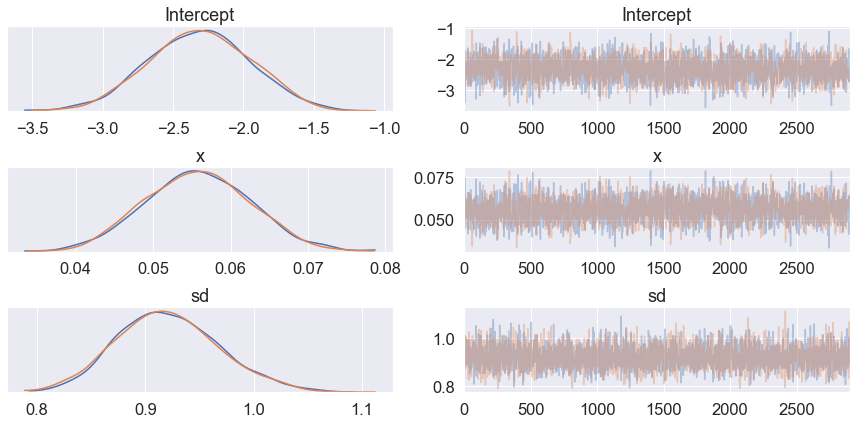

In [11]:
plt.figure(figsize=(7, 7))
traceplot(trace[100:])
plt.tight_layout();

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


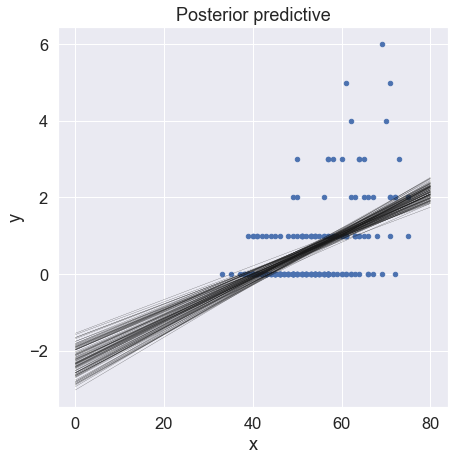

In [12]:
fig, ax = plt.subplots(figsize=(7, 7))
df.plot(kind='scatter', x='x', y='y', ax=ax)
plot_posterior_predictive_glm(trace, eval=np.linspace(0, 80, 100), samples=100)



In [13]:
with Model() as model:
    # specify glm and pass in data. The resulting linear model, its likelihood and
    # and all its parameters are automatically added to our model.
    glm.GLM.from_formula('y ~ x', df, family=glm.families.NegativeBinomial())
    step = NUTS()
    trace = sample(3000, cores=2, step=step) # draw 3000 posterior samples using NUTS sampling
    

Multiprocess sampling (2 chains in 2 jobs)
NUTS: [alpha, mu, x, Intercept]
Sampling 2 chains: 100%|██████████| 7000/7000 [00:19<00:00, 366.01draws/s]


/Users/balarsen/miniconda3/envs/python3/lib/python3.7/site-packages/ipykernel_launcher.py:3: UserWarning: This figure was using constrained_layout==True, but that is incompatible with subplots_adjust and or tight_layout: setting constrained_layout==False. 
  This is separate from the ipykernel package so we can avoid doing imports until


<Figure size 504x504 with 0 Axes>

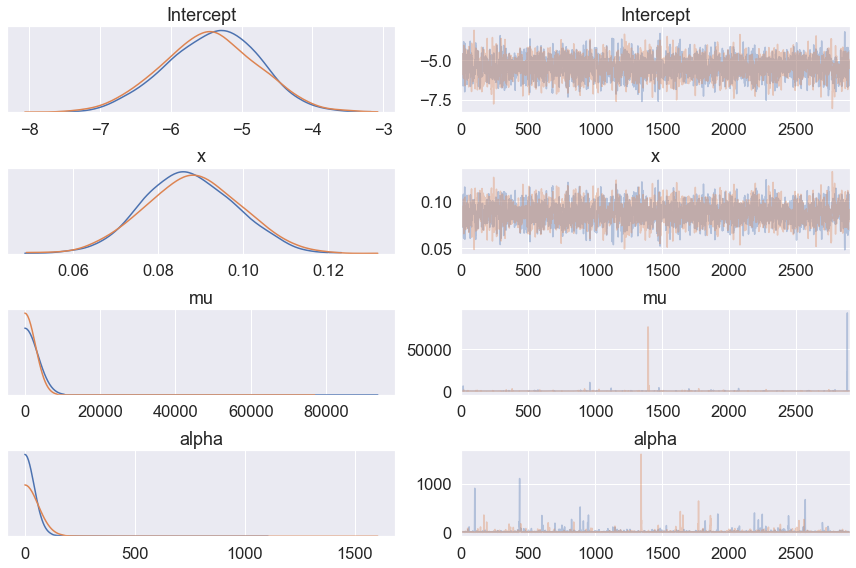

In [14]:
plt.figure(figsize=(7, 7))
traceplot(trace[100:])
plt.tight_layout();

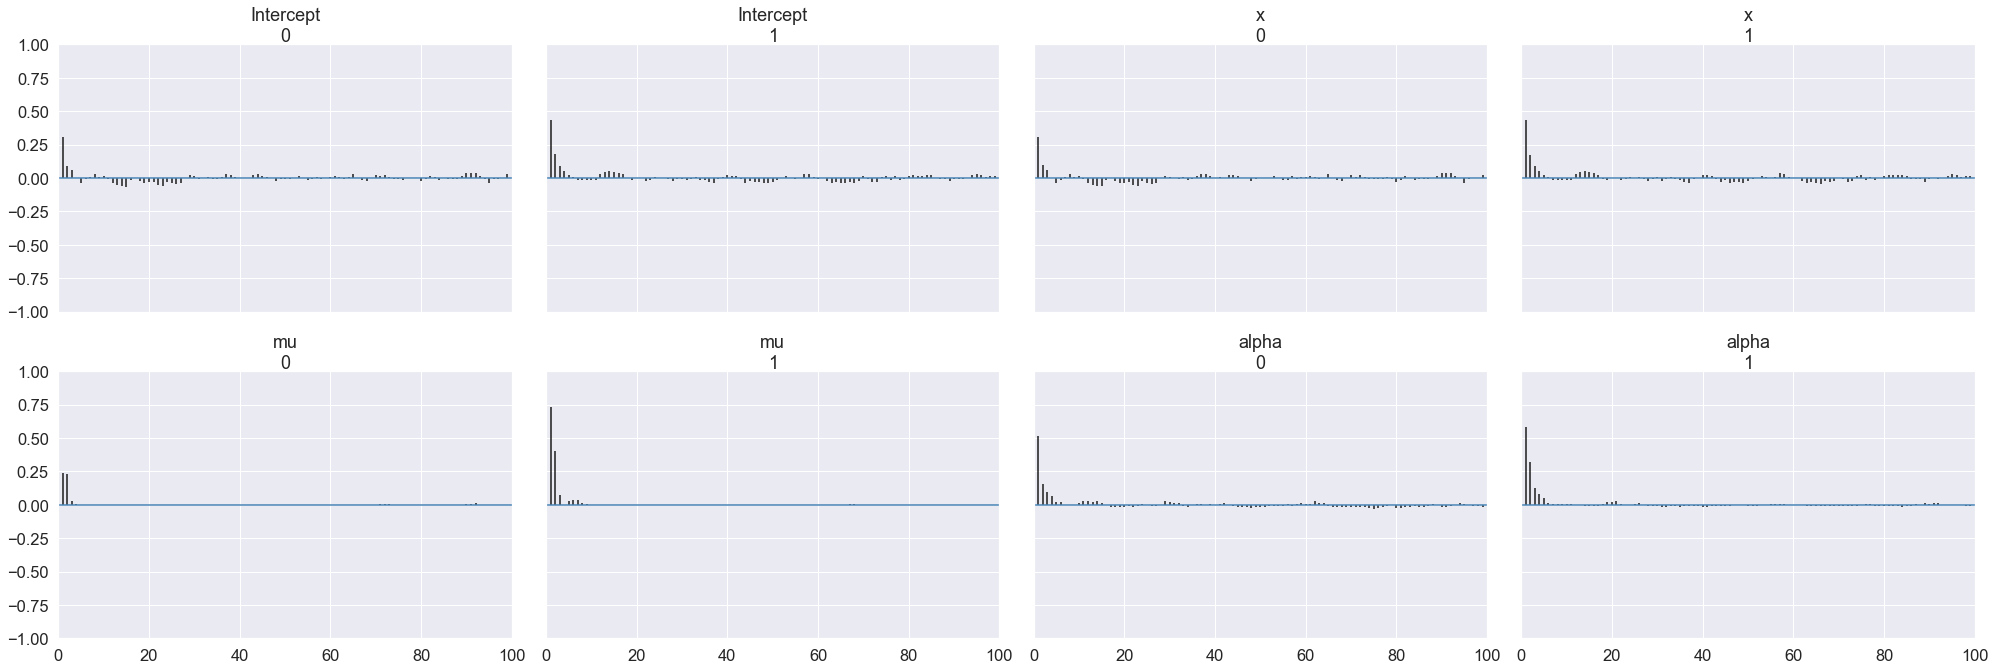

In [15]:
autocorrplot(trace);

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


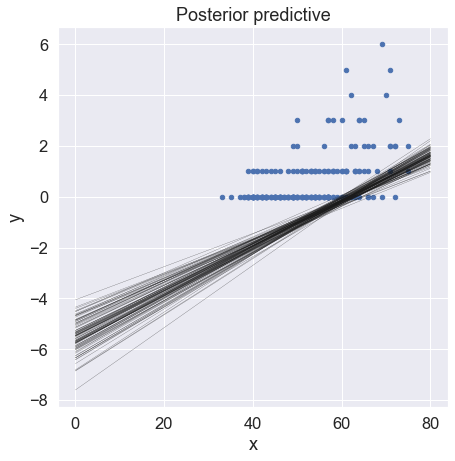

In [16]:
fig, ax = plt.subplots(figsize=(7, 7))
df.plot(kind='scatter', x='x', y='y', ax=ax)
plot_posterior_predictive_glm(trace, eval=np.linspace(0, 80, 100), samples=100)

